# Laboratorio 09 - Visualización de datos
Integrantes:
- José Pablo Kiesling Lange, 21581
- Melissa Pérez Alarcón, 21385

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport 
import seaborn as sns
import kagglehub

## Netflix Movies and TV Shows

In [ ]:
"""
Netflix Movies and TV Shows
"""
path_netflix = kagglehub.dataset_download("shivamb/netflix-shows")

Path to dataset files: /Users/melissa/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


### Exploración de datos

In [ ]:
dataset_netflix = pd.read_csv(path_netflix + "/netflix_titles.csv")

In [ ]:
profile = ProfileReport(dataset_netflix)
profile

In [ ]:
dataset_netflix = dataset_netflix.dropna() 

### Mensaje a transmitir:
El mensaje que se quiere transmitir es la cantidad de películas y series que se han lanzado a lo largo de los años en Netflix.

### Gráfica:
Serie de tiempo de la cantidad de películas y series lanzadas en Netflix a lo largo de los años.

In [ ]:
dataset_netflix['release_year'] = pd.to_numeric(dataset_netflix['release_year'], errors='coerce')
dataset_netflix = dataset_netflix.dropna(subset=['release_year'])
dataset_netflix = dataset_netflix[dataset_netflix['release_year'] >= 2000]

annual_content_netflix = dataset_netflix.groupby('release_year')['title'].count().reset_index()

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=annual_content_netflix, x='release_year', y='title', marker='o')
plt.title('Cantidad de Producción de Contenido en Netflix (2000-2021)')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.tight_layout()
plt.show()

### Justificación
La gráfica de cantidad de lanzamientos anuales permite observar cómo ha evolucionado la producción de contenido en esta plataforma. Con el inicio del streaming, Netflix ha incrementado considerablemente la cantidad de lanzamientos en los últimos años a excepción del 2020, año que se vio afectado por la pandemia.

Se utilizó una gráfica de líneas, ya que es ideal para representar cambios en el tiempo y ayuda a visualizar picos, incrementos o disminuciones en la producción de contenido. Además, se incluyó una cuadrícula suave para que sea más fácil seguir las tendencias anuales, sin añadir distracciones visuales.

## sales-forecasting

In [ ]:
"""
Superstore Sales Dataset
"""
path_sales_forecasting = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

Path to dataset files: /Users/melissa/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2


### Exploración de los datos

In [35]:
dataset_sales_forecasting = pd.read_csv(path_sales_forecasting + "/train.csv")

In [36]:
profile = ProfileReport(dataset_sales_forecasting)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset_sales_forecasting = dataset_sales_forecasting.dropna()

### Mensaje a transmitir:
El mensaje que se quiere transmitir es la tendencia de las ventas a lo largo del tiempo para identificar patrones.

### Gráfica:
Serie de tiempo de las ventas a lo largo del tiempo.

In [ ]:
# Convertir la columna 'Order Date' en datetime para sacar los datos semestrales
dataset_sales_forecasting['Order Date'] = pd.to_datetime(dataset_sales_forecasting['Order Date'], dayfirst=True)

monthly_sales_forecasting = dataset_sales_forecasting.set_index('Order Date').resample('M')['Sales'].sum()

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales_forecasting)
plt.title('Cantidad de Ventas Semestrales del Supermercado')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Justificación
He decidido enfocarme en la tendencia de las ventas de forma semestral porque es fundamental entender cómo han evolucionado las ventas para realizar predicciones precisas usando series de tiempo. La gráfica es ideal para mostrar datos continuos en función del tiempo, permitiendo identificar fácilmente tendencias. Además, se hizo de forma semestral para evitar que la gráfica se vea saturada y sea difícil de interpretar. Al ser semestral, se pueden identificar patrones y tendencias más fácilmente, lo que facilita la toma de decisiones. Finalmente, optimizando la gráfica, me aseguré de que las etiquetas sean descriptivas y legibles, y eliminé elementos que podrían distraer la atención del mensaje principal. Esto reduce la carga cognitiva y facilita que el espectador comprenda rápidamente la información clave presentada.

## GLB.Ts+dSST

In [37]:
"""
GLB.Ts+dSST
"""
import pandas as pd

data_path = "./data/GLB.Ts+dSST.csv"
dataset_glb = pd.read_csv(data_path)

### Exploración de los datos

In [38]:
# convert colums to numeric
dataset_glb = dataset_glb.apply(pd.to_numeric, errors='coerce')

data_info = dataset_glb.info()
data_head = dataset_glb.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 146 entries, ('Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA') to ('2024', '1.24', '1.44', '1.39', '1.31', '1.16', '1.24', '1.20', '1.30', '1.26', '***', '***', '***', '***', '***', '1.34', '1.29', '1.25')
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Land-Ocean: Global Means  144 non-null    float64
dtypes: float64(1)
memory usage: 56.2+ KB


(None,
                                                                                            Land-Ocean: Global Means
 Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                        NaN
 1880 -.20 -.26 -.09 -.17 -.10 -.22 -.20 -.10 -.15 -.23 -.22 -.19 -.18 ***  ***  -.12 -.17                     -0.20
 1881 -.20 -.15 .02  .04  .07  -.19 .01  -.04 -.16 -.22 -.19 -.07 -.09 -.10 -.18 .04  -.07                     -0.19
 1882 .16  .14  .04  -.16 -.14 -.22 -.16 -.07 -.14 -.24 -.17 -.36 -.11 -.09 .07  -.08 -.15                     -0.18
 1883 -.29 -.37 -.12 -.18 -.18 -.07 -.07 -.14 -.22 -.12 -.24 -.11 -.18 -.20 -.34 -.16 -.10                     -0.19)

In [39]:
profile = ProfileReport(dataset_glb)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
missing_values = dataset_glb.isnull().sum()
missing_values

Land-Ocean: Global Means    2
dtype: int64

In [41]:
data_cleaned = dataset_glb.dropna()

In [42]:
data_cleaned.index = data_cleaned.index.droplevel(1)

# calculate annual mean across months
annual_mean = data_cleaned.groupby(level=0).mean()
annual_mean.head()

Land-Ocean: Global Means
1880                     -0.20
1881                     -0.19
1882                     -0.18
1883                     -0.19
1884                     -0.29

In [43]:
# descriptive statistics
annual_stats = annual_mean.describe()
annual_stats

Land-Ocean: Global Means
count                144.000000
mean                   0.080764
std                    0.377465
min                   -0.520000
25%                   -0.190000
50%                   -0.010000
75%                    0.265000
max                    1.410000

### Mensaje a transmitir:
Mostrar el aumento en las anomalías de temperatura a lo largo del tiempo. Esto con el objetivo de demostrar el posible cambio climático y la tendencia de calentamiento global.

### Gráficas:
Gráficas de líneas, histogramas ...

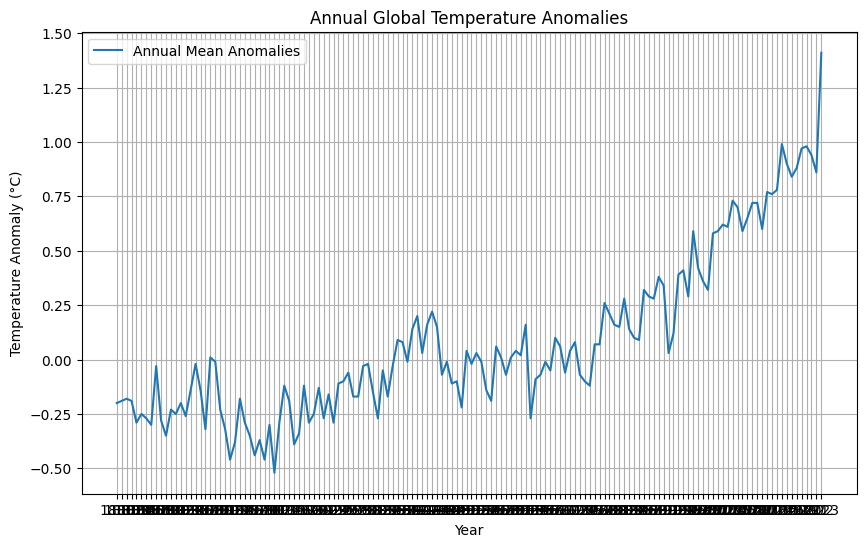

In [45]:
# plot annual temperature anomalies
plt.figure(figsize=(10, 6))
plt.plot(annual_mean.index, annual_mean["Land-Ocean: Global Means"], label="Annual Mean Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Annual Global Temperature Anomalies")
plt.legend()
plt.grid(True)
plt.show()

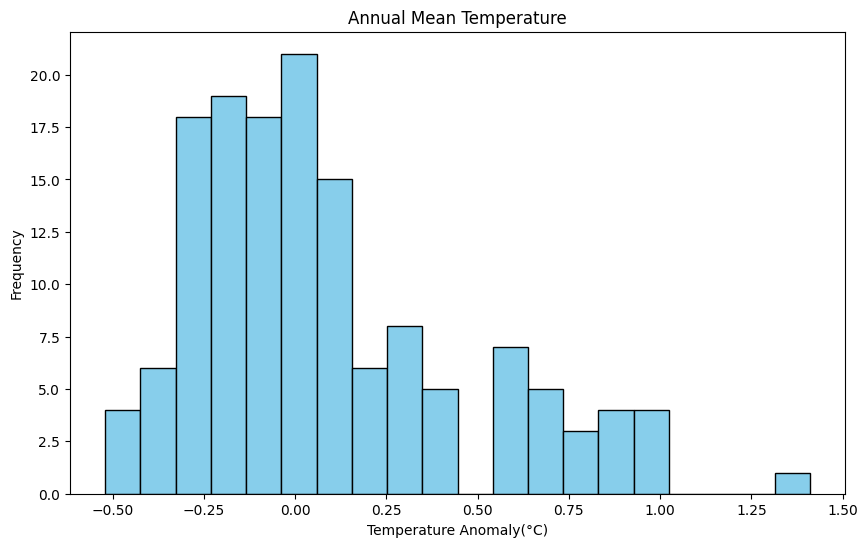

In [44]:
# annual mean temperature plot
plt.figure(figsize=(10, 6))
plt.hist(annual_mean['Land-Ocean: Global Means'], bins=20, color='skyblue', edgecolor='black')
plt.title('Annual Mean Temperature')
plt.xlabel('Temperature Anomaly(°C)')
plt.ylabel('Frequency')
plt.show()

### Optimización de las gráficas

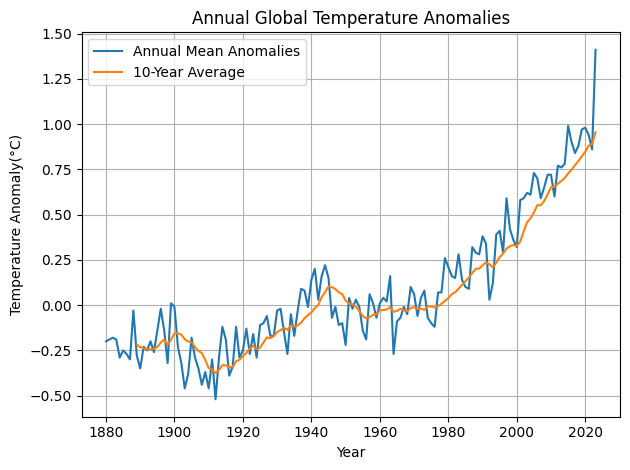

In [48]:
# calculate 10 year average
ten_year_avg = annual_mean['Land-Ocean: Global Means'].rolling(window=10).mean()

plt.figure
plt.plot(annual_mean.index, annual_mean['Land-Ocean: Global Means'], label='Annual Mean Anomalies')
plt.plot(annual_mean.index, ten_year_avg, label='10-Year Average')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly(°C)')
plt.title('Annual Global Temperature Anomalies')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Justificación
Se eligió una gráfica de líneas para representar las anomalías de temperatura globales anuales ya que muestra una clara tendencia a lo largo del tiempo. Se agregó una media de 10 años para destacar la tendencia de calentamiento global y así evitar las distracciones por las variaciones anuales. Esta combinación reduce la carga cognitiva para enfocar la atención en el cambio a largo plazo.

Al usar esta gráfica de líneas, se permite visualizar los datos individuales como en promedio. Además, el colocar una leyenda y una cuadrícula ligera mejoran la interpretación visual, siempre con el objetivo de enfatizar en el posible impacto del cambio climático en las últimas décadas.

Se probó a graficar por medio de un histograma, pero se consideró que no capturaba el mensaje correctamente y podía llegar a tener distintas interpretaciones.

## 4. Depuracion (ventas unitarias)

In [61]:
data_path = "./data/Depuracion.csv"
sales_data = pd.read_csv(data_path)

In [62]:
simplified_sales_data = sales_data.dropna(subset=['Ventas Reales (unidades)', 'Ventas planificadas (unidades)'])

### a) Reducción de carga cognitiva

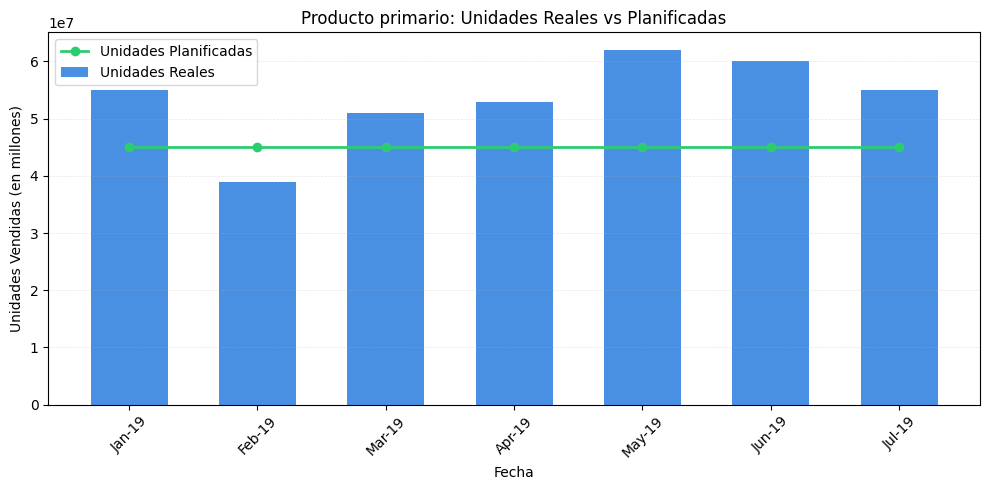

In [63]:
plt.figure(figsize=(10, 5))
plt.bar(simplified_sales_data['Fecha'], simplified_sales_data['Ventas Reales (unidades)'], 
        color='#4a90e2', width=0.6, label='Unidades Reales')
plt.plot(simplified_sales_data['Fecha'], simplified_sales_data['Ventas planificadas (unidades)'], 
        color='#2ecc71', linestyle='-', linewidth=2, label='Unidades Planificadas', marker='o')

plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas (en millones)')
plt.title('Producto primario: Unidades Reales vs Planificadas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### b) Principios de la Gestalt
1. Proximidad: los datos de "Unidades reales" y "Unidades planificadas" se organizan de manera que se perciben como elementos similares pero relacionados.
2. Simplicidad: se han eliminado elementos visuales innecesarios y reducido la intensidad de la cuadrícula.
4. Continuidad: la línea verde continua para las "Unidades planificadas" ayuda a guiar la vista a lo largo de la serie de datos.

### c) Ética en la visualización

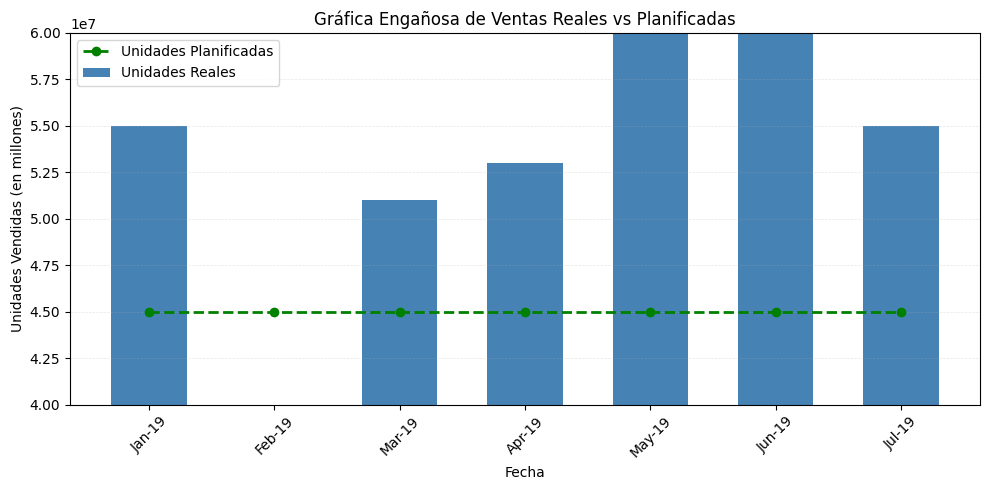

In [ ]:
# Crear gráfica con una escala engañosa en el eje Y
plt.figure(figsize=(10, 5))
plt.bar(simplified_sales_data['Fecha'], simplified_sales_data['Ventas Reales (unidades)'], 
        color='steelblue', width=0.6, label='Unidades Reales')
plt.plot(simplified_sales_data['Fecha'], simplified_sales_data['Ventas planificadas (unidades)'], 
        color='green', linestyle='--', linewidth=2, label='Unidades Planificadas', marker='o')

# Manipulación de la escala del eje Y para exagerar las diferencias
plt.ylim(40000000, 60000000)

plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas (en millones)')
plt.title('Gráfica Engañosa de Ventas Reales vs Planificadas')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

Se ha manipulado el rango del eje Y para comenzar en 40 millones en lugar de 0, lo que exagera las diferencias entre las "Unidades Reales" y las "Unidades Planificadas". Esto ha generado una gráfica engañosa porque hace que las variaciones pequeñas parezcan grandes, lo cual podría llevar a una conclusión errónea sobre el desempeño de las ventas.

### Encuentre un ejemplo real de una visualización engañosa en medios de comunicación y explique cómo podría corregirse

![alt text](./image.png)

Como se puede apreciar, esta gráfica es engañosa porque se representa la diferenencia entre la esperanza de vida entre hombres y mujeres (línea roja) y la esperanza de vida de cada género (azul y verde respectivamente) juntando dos gráficas distintas en una sola. Asimismo, se usa dos escalaas diferentes en el eje y con distintos rangos. Esto puede introducir confusión y malinterpretación ya que la escala de la diferencia hace que los cambios parezcan más pronunciados que los cambios reales en la esperanza de vida de cada género. 

Para corregir esta visualización, se podrían separar las gráficas en dos, una para la esperanza de vida de hombres y mujeres y otra para la diferencia entre ambas. Además, se podría usar una sola escala en el eje y para que sea más fácil comparar las diferencias entre las esperanzas de vida de hombres y mujeres.

### d) Comparación de visualizaciones
- El generar visualizaciones con configuraciones predeterminadas tenemos las limitaciones como la elección de colores arbitrarios, la escala de los ejes no puede ser la adecuada a los datos, el uso de cuadrícula puede no guiar el análisis de datos.
- Por otro lado, al usar una visualización optimizada permite la personalización de colores, ajustar las escalas para mostrar el rango completo de datos sin truncar ni exagerar las diferencias. 
- Básicamente, con una visualización optimizada, permite tener una mejor claridad en contraste y organización para una buena interpretación, mientras que una predeterminada puede dejar ambigüedades. 

### e) Atributos preatentivos

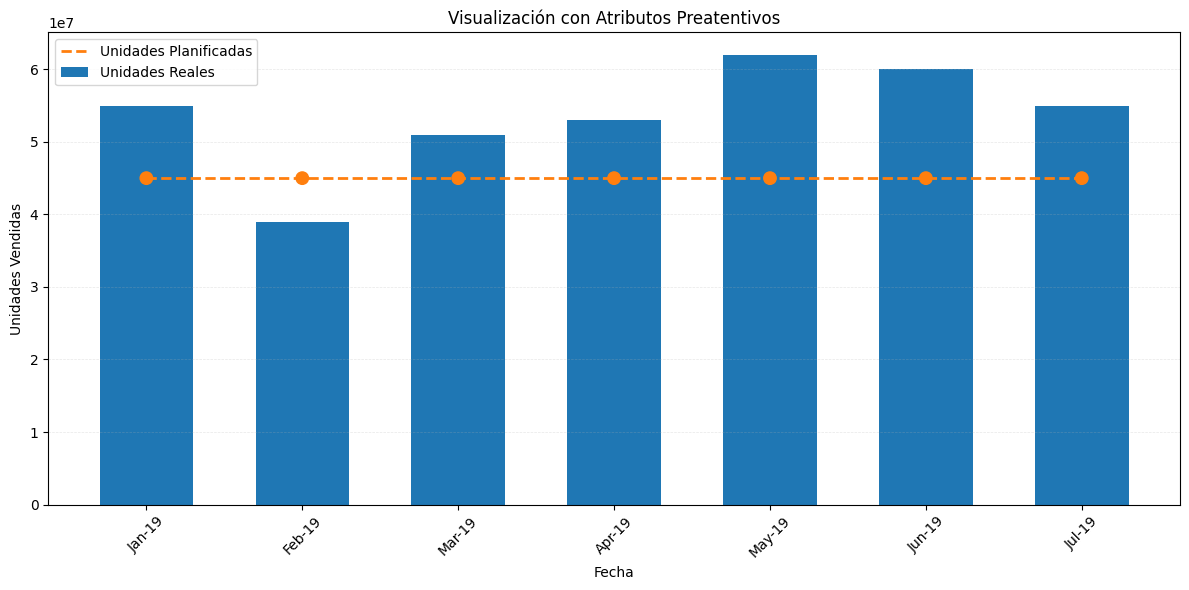

In [ ]:
plt.figure(figsize=(12, 6))

# Atributo preatentivo 1: Color para diferenciar categorías
plt.bar(simplified_sales_data['Fecha'], simplified_sales_data['Ventas Reales (unidades)'], 
        color='#1f77b4', width=0.6, label='Unidades Reales')

# Atributo preatentivo 2: Forma de los datos
# Usar línea y puntos para "Unidades Planificadas" en lugar de barras
plt.plot(simplified_sales_data['Fecha'], simplified_sales_data['Ventas planificadas (unidades)'], 
         color='#ff7f0e', linestyle='--', linewidth=2, label='Unidades Planificadas')

# Atributo preatentivo 3: Tamaño de los marcadores para resaltar desviaciones
sizes = [80 if abs(r - p) > 5000000 else 40 for r, p in zip(simplified_sales_data['Ventas Reales (unidades)'], 
                                                            simplified_sales_data['Ventas planificadas (unidades)'])]

plt.scatter(simplified_sales_data['Fecha'], simplified_sales_data['Ventas planificadas (unidades)'], 
            color='#ff7f0e', s=sizes, marker='o')

plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.title('Visualización con Atributos Preatentivos')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

## Crítica constructiva de otro equipo


#### Grupo 14:
La eliminación de la grilla y cambiar la escala del eje Y facilitan bastante la comprensión de la variabilidad en ventas reales por mes. Los títulos y las leyendas son lo suficientemente descriptivos para reconocer rápidamente a qué se refieren las barras  de ventas reales y la línea de ventas planificadas. Además, el contraste de colores hace llamar la atención sobre la línea de ventas planificadas, el cual es un punto importante del conjunto de datos.

Tal vez sería buena idea no alterar el ángulo de las fechas en el eje X, puesto que, en esta posición se requiere más tiempo para comprender la fecha a la que se refiere cada una de las barras. Por otro lado, eliminar los bordes superior y derecho podría hacer que la gráfica tenga una imagen más limpia, eliminando congestión innecesaria.

## Reflexión final
Desde el inicio el objetivo fue explorar y optimizar la visualización de distintos conjuntos de datos, para poder dar una buena interpretación con principios de diseño que aumenten la claridad y reduzcan la carga cognitiva del espectador. Este laboratorio tuvo un mayor aprendizaje en cuando a la implementación de mejoras basadas en la teoría de la Gestalt y atributos preatentivos. 

Básicamente se ha demostrado que una visualización bien diseñada no solo facilita la comprensión de los datos, sino que también respeta la integridad y la precisión en la comunicación de información. Por lo que para lograr una presentación de datos clara y confiable, se necesita aplicar principios de diseño visual y técnicas éticas. 